In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor  #for VIF

## Task 1
#### Import the raw data (CC_Default.csv) into your Jupyter notebook.

In [44]:
pdata = pd.read_csv('C:\\Users\\stunn\\Notebook\\Capstone\\CC_Default.csv')

## Task 1.1
#### Check if the data is loaded correctly by printing a few observations. Check the total number of observations and variables.

In [46]:
pdata.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

In [47]:
pdata.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

In [48]:
# Shape of data

pdata.shape

(30000, 25)

In [49]:
pdata.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

## Task 1.2
#### Provide the descriptive statistics and manipulate data

In [51]:
# type of data

pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [52]:
# A. Check for missing values if any.

pdata.isnull().values.any()

False

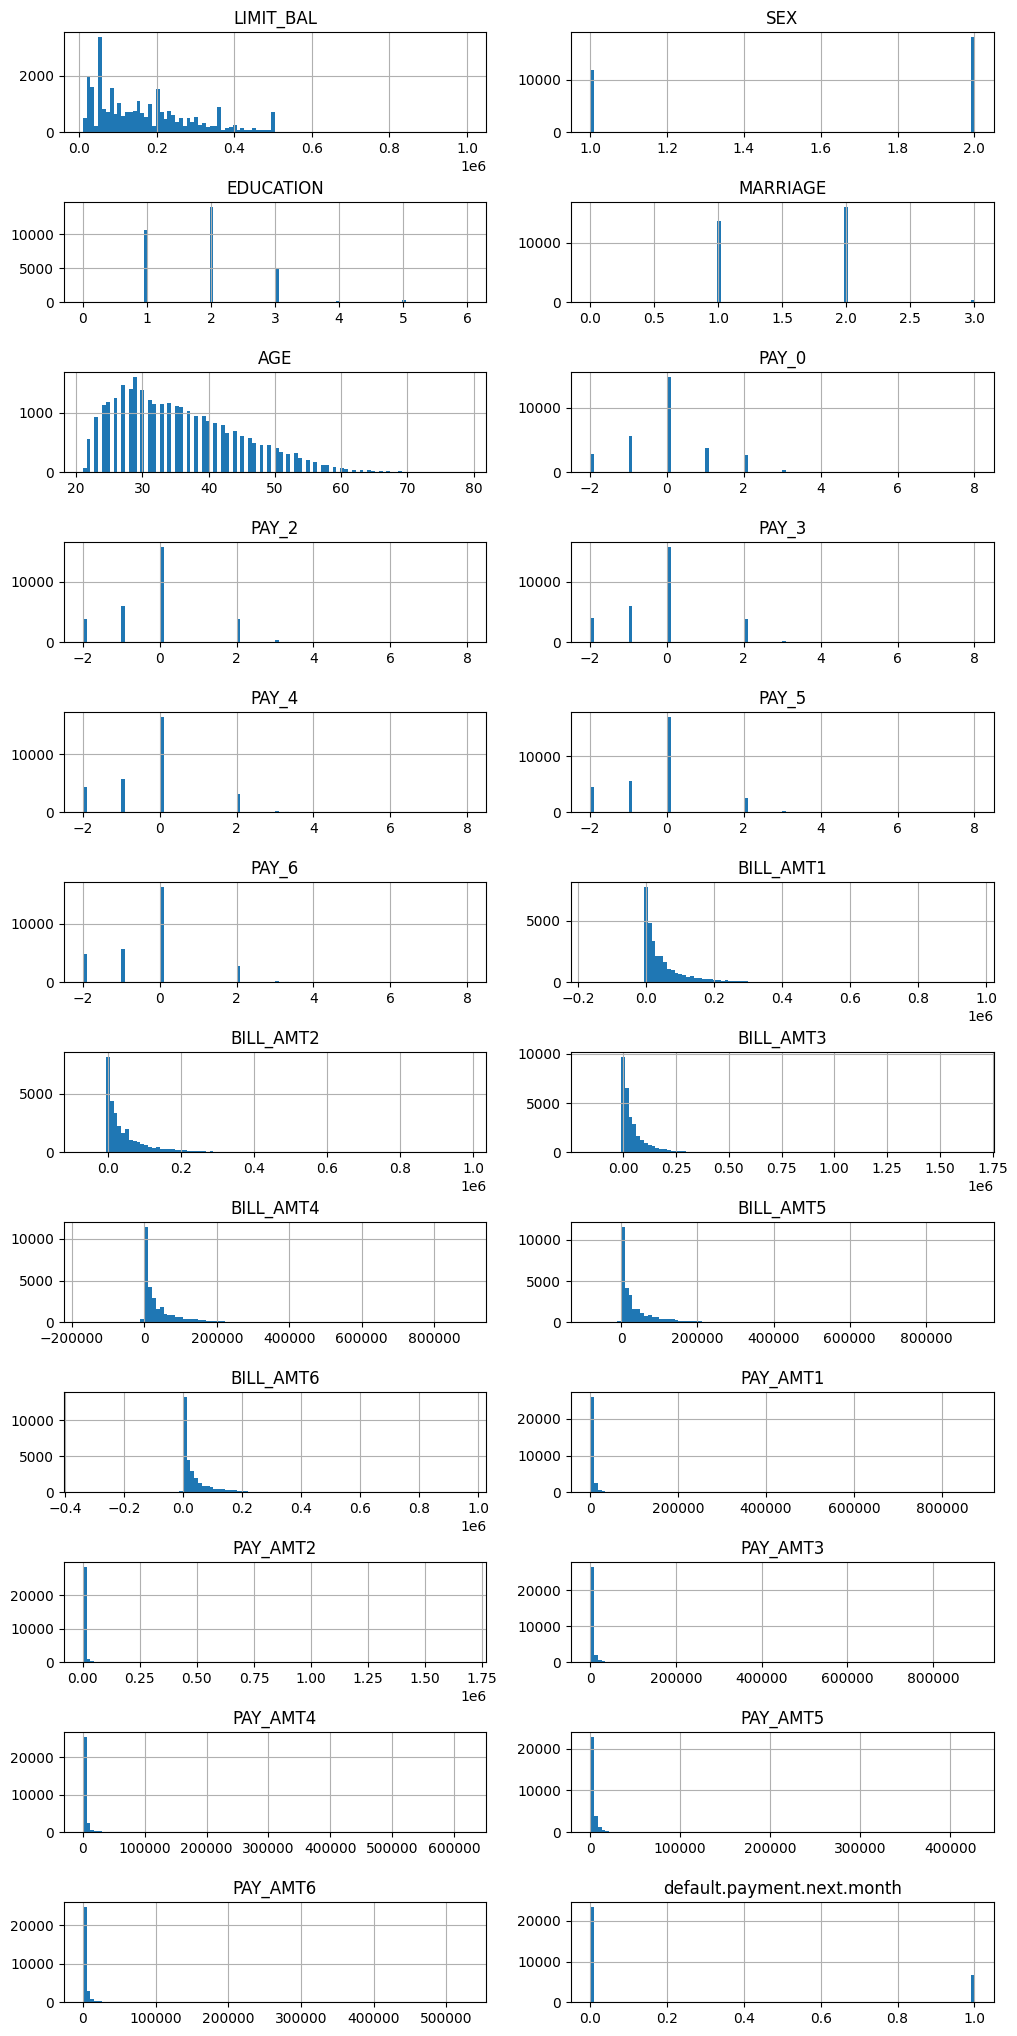

In [53]:
# B. Plot the univariate distribution.

columns = list(pdata)[1:] # List of columns created excluding 'ID' column.

pdata[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)) # Histogram of all columns except last column ('ID')

plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [54]:
# C. Convert the relevant variables such as payment variables (Pay0-Pay6 and customer related variables) to categorical variables as appropriate.

payment_columns = ['SEX','EDUCATION','MARRIAGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
pdata[payment_columns] = pdata[payment_columns].astype('category')

In [55]:
# type of data after categorized

pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          30000 non-null  int64   
 1   LIMIT_BAL                   30000 non-null  float64 
 2   SEX                         30000 non-null  category
 3   EDUCATION                   30000 non-null  category
 4   MARRIAGE                    30000 non-null  category
 5   AGE                         30000 non-null  int64   
 6   PAY_0                       30000 non-null  category
 7   PAY_2                       30000 non-null  category
 8   PAY_3                       30000 non-null  category
 9   PAY_4                       30000 non-null  category
 10  PAY_5                       30000 non-null  category
 11  PAY_6                       30000 non-null  category
 12  BILL_AMT1                   30000 non-null  float64 
 13  BILL_AMT2       

## Task 1.3
#### Find the variables that are correlated and the variables that might help in finding the defaulters next month using a few plots. 
#### The plots should provide insights on the following:

#### A. The independent variable that should help identify those who will default from the next month’s credit card payment
#### B. The relation between dependent and independent variables
#### C. The correlations among the variables, etc.

In [57]:
# correlations among variables.

pdata.corr()

ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.026179  0.018497   0.039177   
LIMIT_BAL                   0.026179   1.000000  0.024755  -0.219161   
SEX                         0.018497   0.024755  1.000000   0.014232   
EDUCATION                   0.039177  -0.219161  0.014232   1.000000   
MARRIAGE                   -0.029079  -0.108139 -0.031389  -0.143464   
AGE                         0.018678   0.144713 -0.090874   0.175061   
PAY_0                      -0.030575  -0.271214 -0.057643   0.105364   
PAY_2                      -0.011215  -0.296382 -0.070771   0.121566   
PAY_3                      -0.018494  -0.286123 -0.066096   0.114025   
PAY_4                      -0.002735  -0.267460 -0.060173   0.108793   
PAY_5                      -0.022199  -0.249411 -0.055064   0.097520   
PAY_6                      -0.020270  -0.235195 -0.044008   0.082316   
BILL_AMT1                   0.019389   0.285430 -0.033642   0.023581   
BILL_AMT2                   0.017982   0.278314 -0.031183   0.018749   
BILL_AMT3                   0.024354   0.283236 -0.024563   0.013002   
BILL_AMT4                   0.040351   0.293988 -0.021880  -0.000451   
BILL_AMT5                   0.016705   0.295562 -0.017005  -0.007567   
BILL_AMT6                   0.016730   0.290389 -0.016733  -0.009099   
PAY_AMT1                    0.009742   0.195236 -0.000242  -0.037456   
PAY_AMT2                    0.008406   0.178408 -0.001391  -0.030038   
PAY_AMT3                    0.039151   0.210167 -0.008597  -0.039943   
PAY_AMT4                    0.007793   0.203242 -0.002229  -0.038218   
PAY_AMT5                    0.000652   0.217202 -0.001667  -0.040358   
PAY_AMT6                    0.003000   0.219595 -0.002766  -0.037200   
default.payment.next.month -0.013952  -0.153520 -0.039961   0.028006   

                            MARRIAGE       AGE     PAY_0     PAY_2     PAY_3  \
ID                         -0.029079  0.018678 -0.030575 -0.011215 -0.018494   
LIMIT_BAL                  -0.108139  0.144713 -0.271214 -0.296382 -0.286123   
SEX                        -0.031389 -0.090874 -0.057643 -0.070771 -0.066096   
EDUCATION                  -0.143464  0.175061  0.105364  0.121566  0.114025   
MARRIAGE                    1.000000 -0.414170  0.019917  0.024199  0.032688   
AGE                        -0.414170  1.000000 -0.039447 -0.050148 -0.053048   
PAY_0                       0.019917 -0.039447  1.000000  0.672164  0.574245   
PAY_2                       0.024199 -0.050148  0.672164  1.000000  0.766552   
PAY_3                       0.032688 -0.053048  0.574245  0.766552  1.000000   
PAY_4                       0.033122 -0.049722  0.538841  0.662067  0.777359   
PAY_5                       0.035629 -0.053826  0.509426  0.622780  0.686775   
PAY_6                       0.034345 -0.048773  0.474553  0.575501  0.632684   
BILL_AMT1                  -0.023472  0.056239  0.187068  0.234887  0.208473   
BILL_AMT2                  -0.021602  0.054283  0.189859  0.235257  0.237295   
BILL_AMT3                  -0.024909  0.053710  0.179785  0.224146  0.227494   
BILL_AMT4                  -0.023344  0.051353  0.179125  0.222237  0.227202   
BILL_AMT5                  -0.025393  0.049345  0.180635  0.221348  0.225145   
BILL_AMT6                  -0.021207  0.047613  0.176980  0.219403  0.222327   
PAY_AMT1                   -0.005979  0.026147 -0.079269 -0.080701  0.001295   
PAY_AMT2                   -0.008093  0.021785 -0.070101 -0.058990 -0.066793   
PAY_AMT3                   -0.003541  0.029247 -0.070561 -0.055901 -0.053311   
PAY_AMT4                   -0.012659  0.021379 -0.064005 -0.046858 -0.046067   
PAY_AMT5                   -0.001205  0.022850 -0.058190 -0.037093 -0.035863   
PAY_AMT6                   -0.006641  0.019478 -0.058673 -0.036500 -0.035861   
default.payment.next.month -0.024339  0.013890  0.324794  0.263551  0.235253   

                               PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
ID

<Axes: >

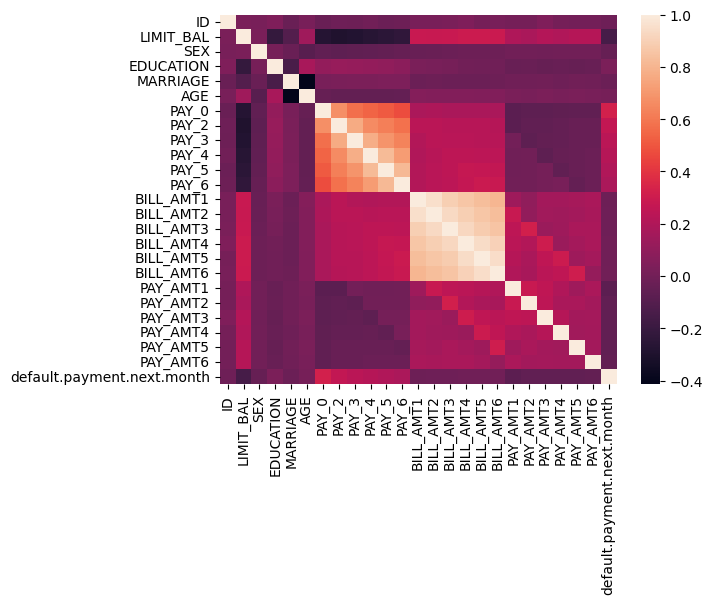

In [58]:
sns.heatmap(pdata.corr())

In [59]:
# compute the vif for all given features
def compute_vif(considered_features):

    X = pdata.loc[:,considered_features]         #X = df[considered_features]    #deprecated

    # the calculation of variance inflation requires a constant
    X['intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [60]:
# Look at VIF for all the numeric
considered_features = ['SEX','EDUCATION','MARRIAGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default.payment.next.month']

# compute vif
compute_vif(considered_features).sort_values('VIF', ascending=False)

Variable        VIF
12                   BILL_AMT2  25.865698
15                   BILL_AMT5  24.996699
13                   BILL_AMT3  21.775713
14                   BILL_AMT4  20.346967
16                   BILL_AMT6  15.025096
11                   BILL_AMT1  14.046666
7                        PAY_5   4.725374
6                        PAY_4   4.287511
5                        PAY_3   3.658790
8                        PAY_6   3.256193
4                        PAY_2   3.176901
18                    PAY_AMT2   2.237277
3                        PAY_0   1.996411
19                    PAY_AMT3   1.757030
17                    PAY_AMT1   1.708856
21                    PAY_AMT5   1.687910
20                    PAY_AMT4   1.648796
9                    LIMIT_BAL   1.559410
10                         AGE   1.276241
2                     MARRIAGE   1.231223
22                    PAY_AMT6   1.169991
23  default.payment.next.month   1.141573
1                    EDUCATION   1.126831
0                          SEX   1.024337

In [61]:
considered_features = ['SEX','EDUCATION','MARRIAGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','LIMIT_BAL','AGE' ,'BILL_AMT1','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default.payment.next.month']

# compute vif
compute_vif(considered_features).sort_values('VIF', ascending=False)

Variable       VIF
7                        PAY_5  4.701167
6                        PAY_4  4.274161
5                        PAY_3  3.636428
8                        PAY_6  3.190207
4                        PAY_2  3.169390
3                        PAY_0  1.995357
9                    LIMIT_BAL  1.539568
11                   BILL_AMT1  1.337817
10                         AGE  1.276162
2                     MARRIAGE  1.231008
12                    PAY_AMT1  1.202134
14                    PAY_AMT3  1.190676
13                    PAY_AMT2  1.180183
15                    PAY_AMT4  1.145353
18  default.payment.next.month  1.141428
1                    EDUCATION  1.125673
17                    PAY_AMT6  1.114197
16                    PAY_AMT5  1.109213
0                          SEX  1.023383

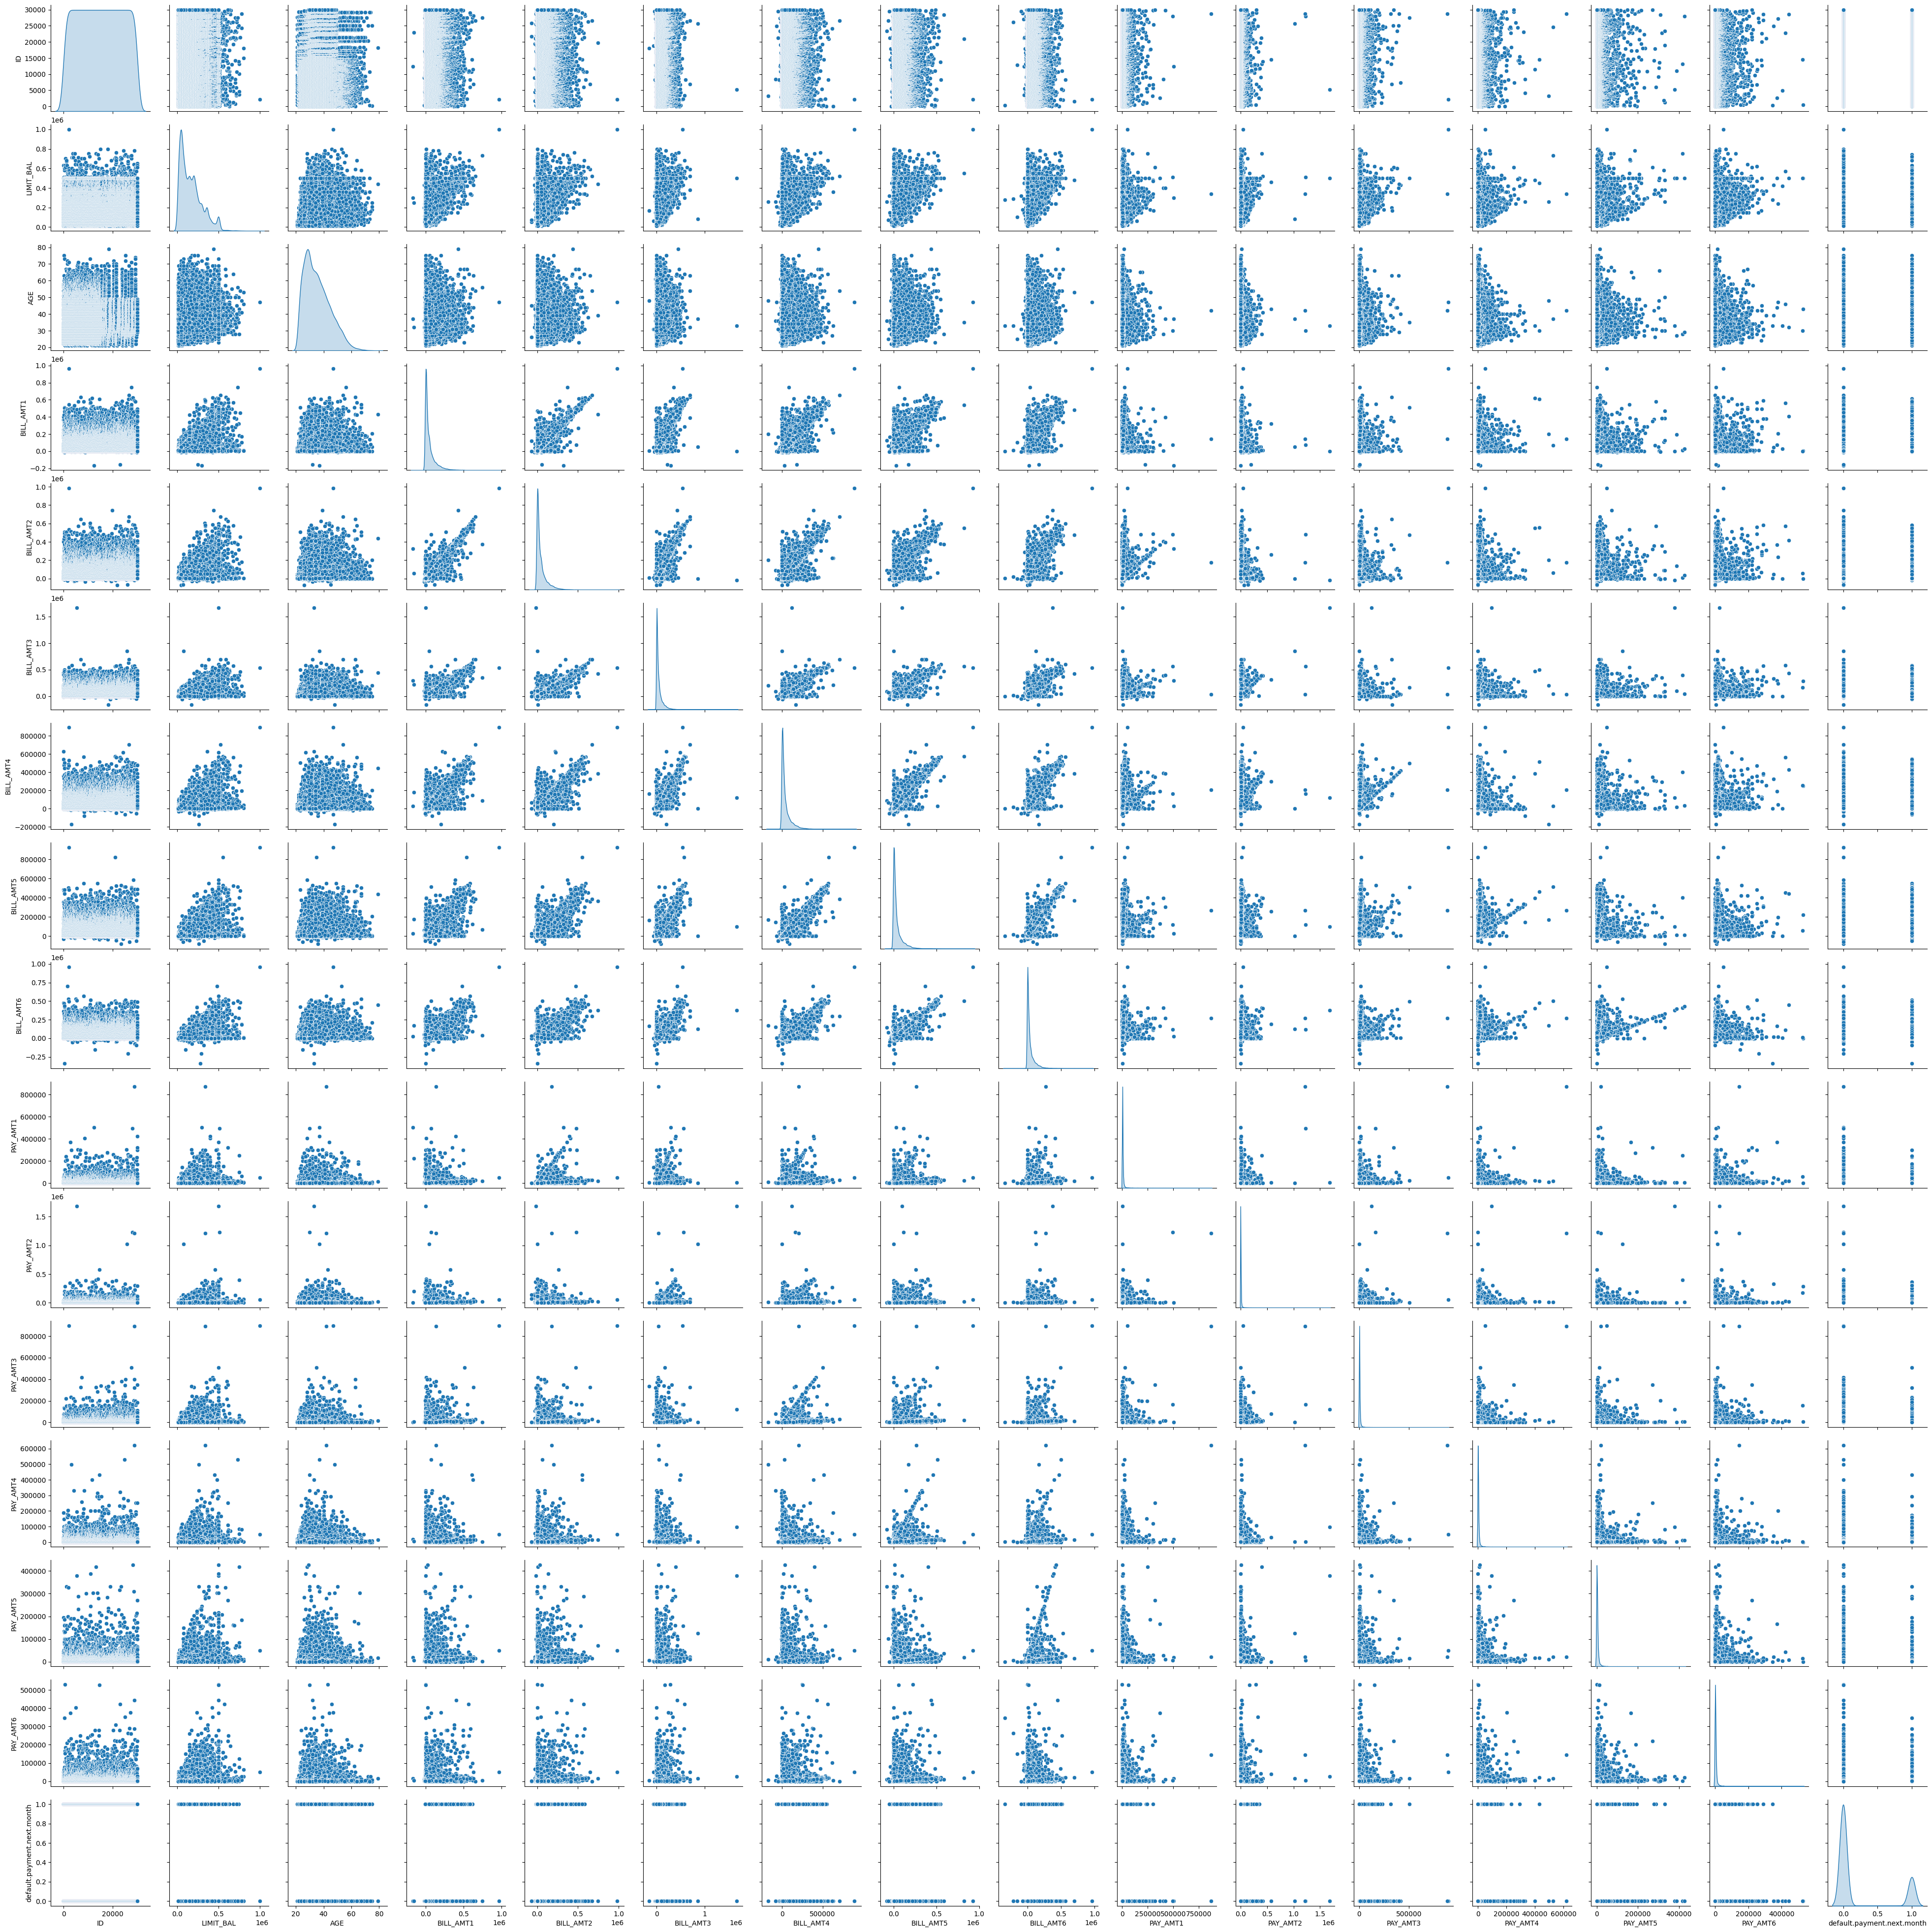

In [62]:
sns.pairplot(pdata,diag_kind='kde')

## TASK 1.4 
#### Provide your insights on the variables and the relationship among the variables based on your analysis in Task 1.3 in a markdown cell in your Jupyter notebook.

**Answer**

The independent variables are used to determine the dependent variable.

Independent variables - SEX, EDUCATION, MARRIAGE, PAY_0-6, LIMIT_BAL, AGE, PAY_AMT1-6, BILL_AMT 1-6

Dependent variable - default.payment.next.month. Shows minimal correlation with the independent variables from the heatmap and VIF table. VIF <5 for all independent variables (except ID and BILL_AMT 1-6)

Correlated variables - BILL_AMT 2-6 shows high positive correlation from heatmap and VIF table. (VIF > 14)
Correlated variables - PAY_0-6 shows moderate positive correlation from heatmap and VIF table.

Dropped features - ID (irrelevent to data analysis)